In [2]:
import pandas as pd
import numpy as np
from unidecode import unidecode
import matplotlib.pyplot as plt
import seaborn as sns
import jdatetime
from datetime import datetime
pd.set_option('display.encoding', 'utf-8')
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv(
    'houseData.csv',
    index_col=[0]
)

print(df.info())
print('-' * 30)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 0 to 835
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       836 non-null    object
 1   YearBuilt  836 non-null    object
 2   Rooms      836 non-null    object
 3   Location   836 non-null    object
 4   Price      836 non-null    object
 5   Floor      836 non-null    object
dtypes: object(6)
memory usage: 45.7+ KB
None
------------------------------
       Area YearBuilt Rooms     Location        Price Floor
count   836       836   836          836          836   836
unique  188        32     6          172          458    46
top     ۱۱۰      ۱۴۰۲     ۲   سعادت‌آباد  ۱۴۵۰۰۰۰۰۰۰۰     0
freq     28       141   426           47           12   109


In [4]:
def persianDigitToEnglish(value):
    return unidecode(value)

numeric_columns = ['Area', 'YearBuilt', 'Rooms', 'Price', 'Floor']
text_column = 'Location'    

df[numeric_columns] = df[numeric_columns].applymap(persianDigitToEnglish)

In [5]:
df['Area'] = df['Area'].astype(np.uint16)
df['YearBuilt'] = df['YearBuilt'].astype(np.uint16)
df['Rooms'] = df['Rooms'].astype(np.uint8)
df['Price'] = df['Price'].astype(np.uint64)
df['Floor'] = df['Floor'].astype(np.uint8)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 0 to 835
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       836 non-null    uint16
 1   YearBuilt  836 non-null    uint16
 2   Rooms      836 non-null    uint8 
 3   Location   836 non-null    object
 4   Price      836 non-null    uint64
 5   Floor      836 non-null    uint8 
dtypes: object(1), uint16(2), uint64(1), uint8(2)
memory usage: 24.5+ KB
None


,Area,YearBuilt,Rooms,Location,Price,Floor
0,87,1400,2,مرزداران,13920000000,7
1,98,1397,2,کوی فردوس,10600000000,5
2,60,1396,1,ابراهیم‌آباد,1560000000,1
3,87,1394,2,سازمان برنامه,9500000000,3
4,170,1375,3,فرمانیه,34000000000,2


In [6]:
def calculate_age(year):
    today_date = datetime.now()
    persian_date = jdatetime.GregorianToJalali(gyear=today_date.year, gmonth=today_date.month, gday=today_date.day)
    return persian_date.jyear - year

df['BuildingAge'] = df['YearBuilt'].map(calculate_age)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30076\170180603.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_location['Location'] = top_10_location['Location'].map(get_display)


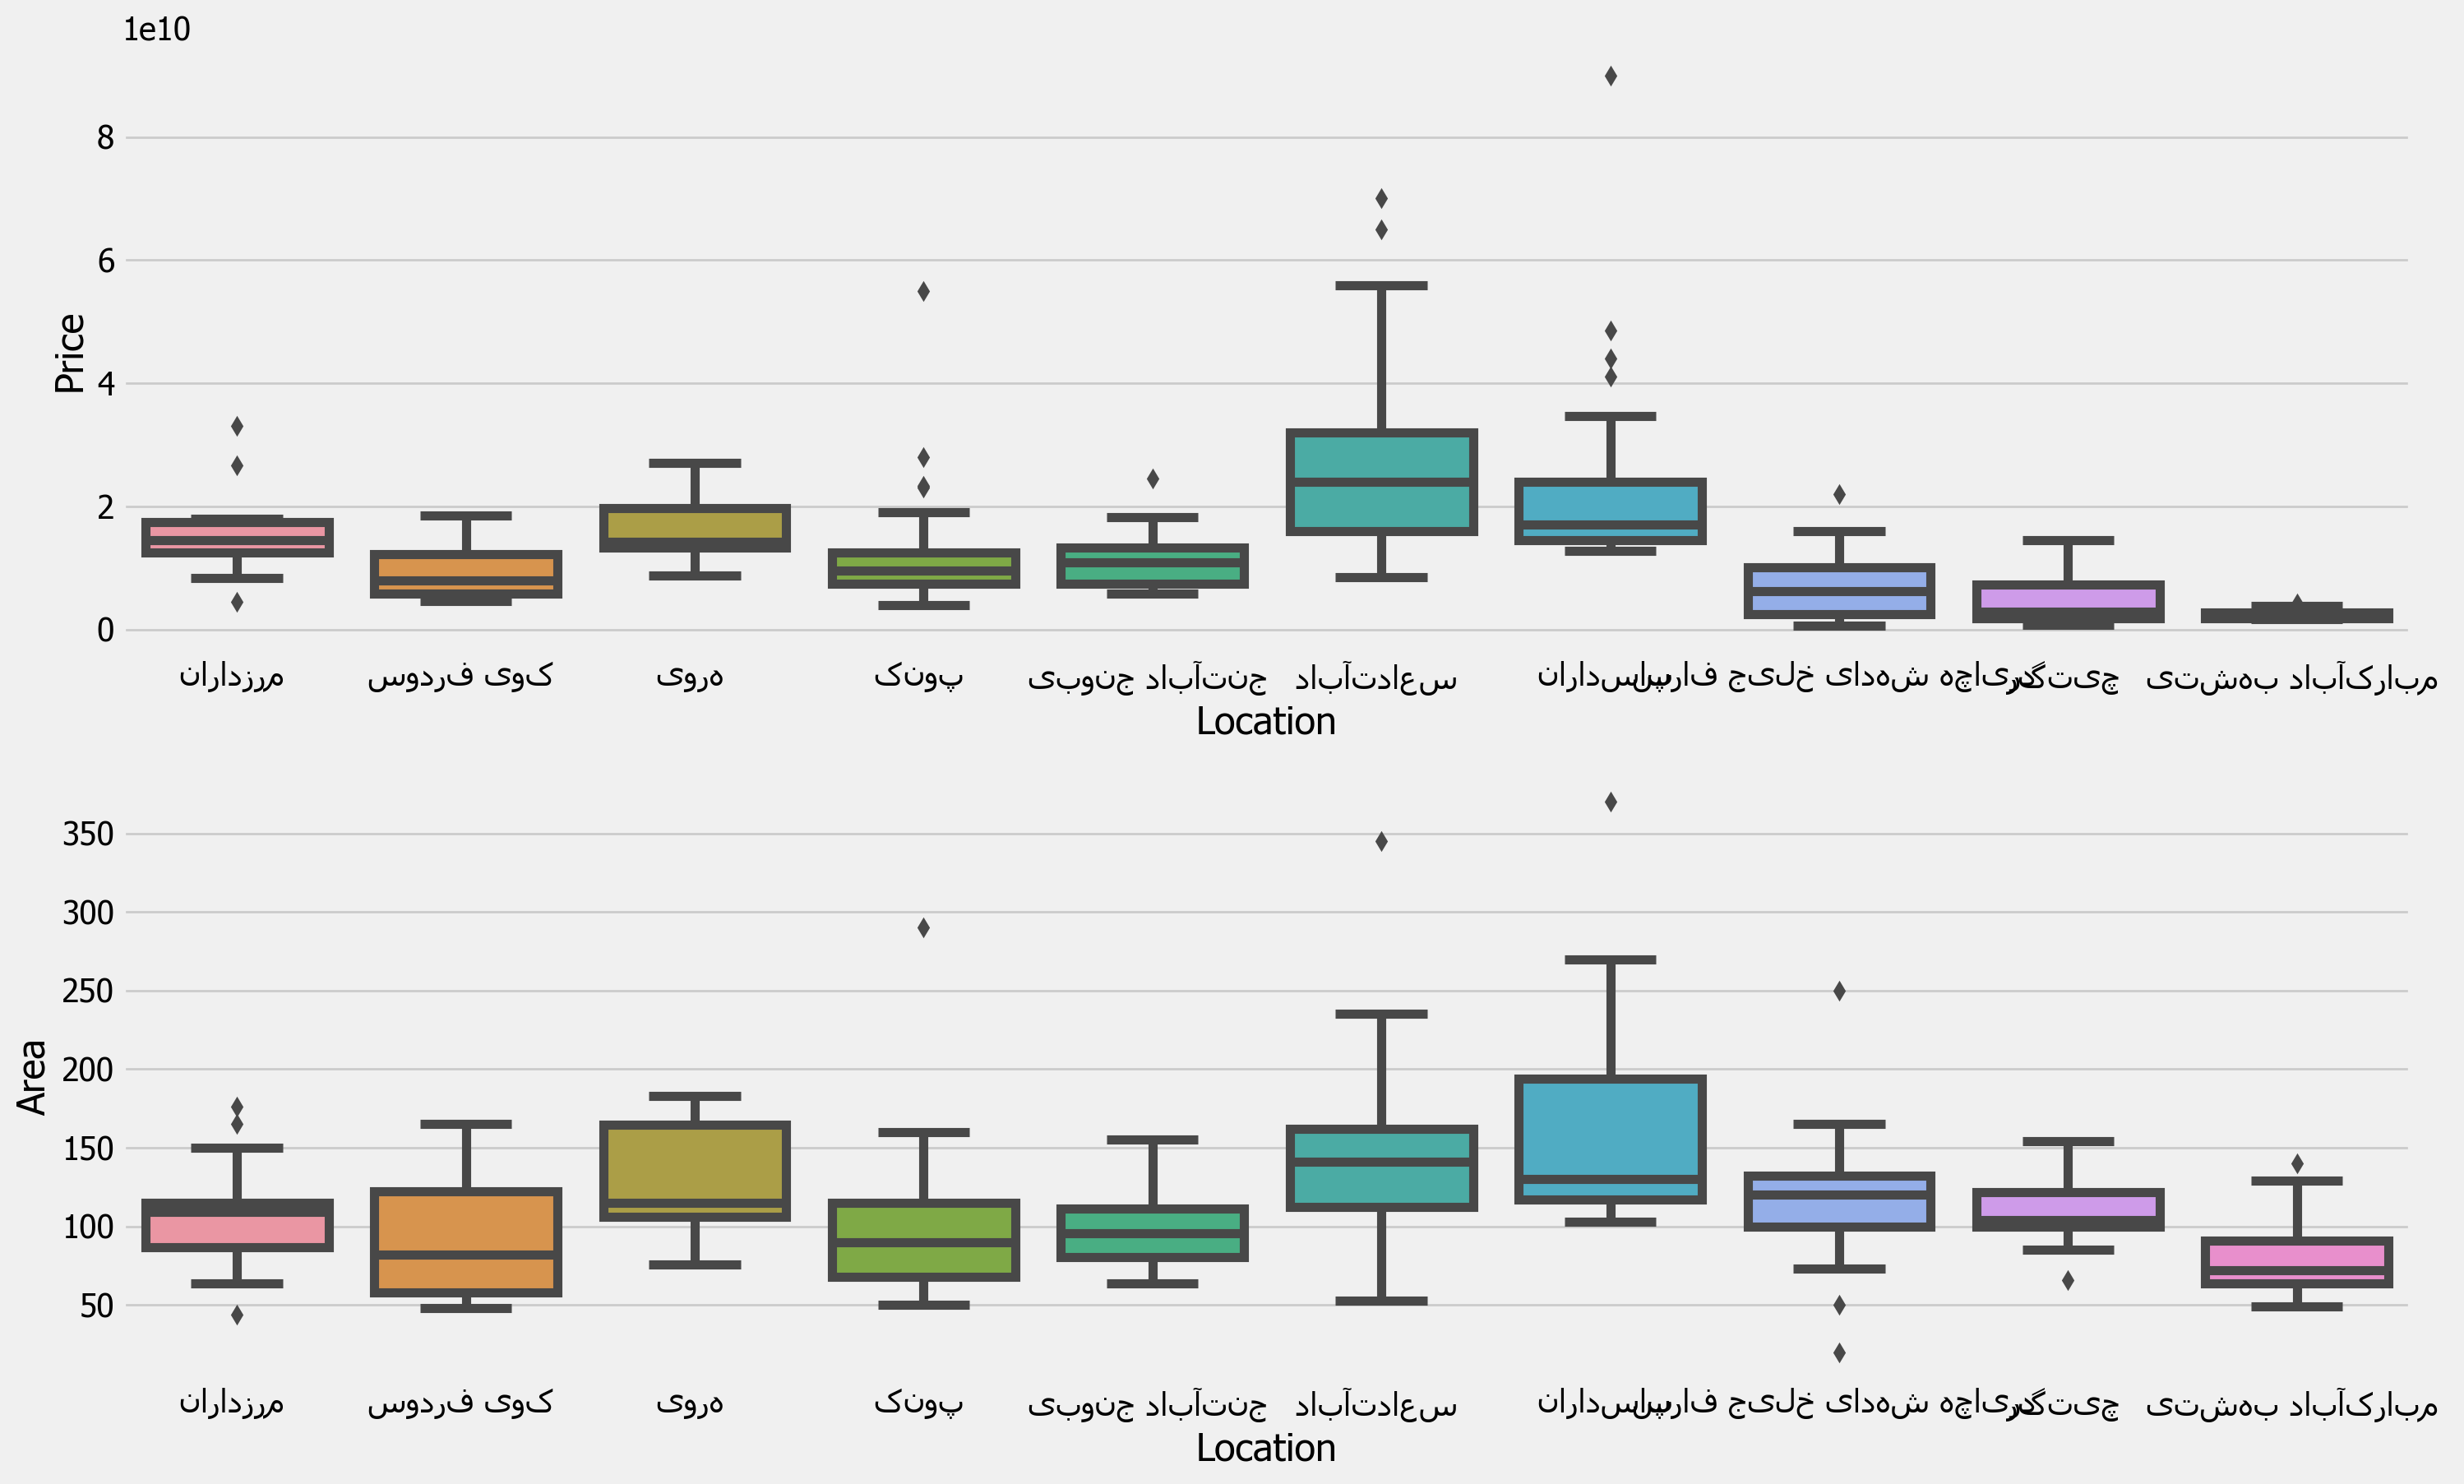

In [12]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from bidi.algorithm import get_display
plt.rcParams['font.family'] = 'Tahoma'


fig, axes = plt.subplots(nrows=2, figsize=(16, 10))
cols = ['Price', 'Area']
top_10_location = df[df['Location'].isin(df['Location'].value_counts()[:10].index)]
top_10_location['Location'] = top_10_location['Location'].map(get_display)
for i, row in enumerate(axes):
    try:
        sns.boxplot(data=top_10_location, x='Location', y=cols[i], ax=axes[i])
    except IndexError:
        pass

In [8]:
# df['Location'].value_counts()[:10]
df[df['Location'].isin(df['Location'].value_counts()[:10].index)]

,Area,YearBuilt,Rooms,Location,Price,Floor,BuildingAge
0,87,1400,2,مرزداران,13920000000,7,2
1,98,1397,2,کوی فردوس,10600000000,5,5
6,105,1401,2,هروی,14000000000,7,1
7,90,1387,2,پونک,10750000000,1,15
8,67,1383,2,جنت‌آباد جنوبی,6666000000,0,19
...,...,...,...,...,...,...,...
819,157,1387,3,سعادت‌آباد,20000000000,2,15
828,85,1402,2,سعادت‌آباد,16000000000,1,0
829,62,1400,2,مبارک‌آباد بهشتی,1750000000,4,2
832,89,1400,2,مبارک‌آباد بهشتی,2403000000,2,2


In [9]:
df['Location'].value_counts().sort_values(ascending=False)[:10].index

Index([' سعادت‌آباد', ' پاسداران', ' پونک', ' دریاچه شهدای خلیج فارس',
       ' مبارک‌آباد بهشتی', ' چیتگر', ' کوی فردوس', ' هروی', ' جنت‌آباد جنوبی',
       ' مرزداران'],
      dtype='object', name='Location')

In [13]:
df.to_csv('final.csv', encoding='utf-8-sig')

In [22]:
from sklearn.cluster import KMeans

cluster_data = df[['Area', 'BuildingAge', 'Price', 'Rooms', 'Floor']]

score_dict = {}

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(cluster_data)
    score_dict[i] = kmeans.inertia_




f:\Projects\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Projects\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Projects\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Projects\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to supp

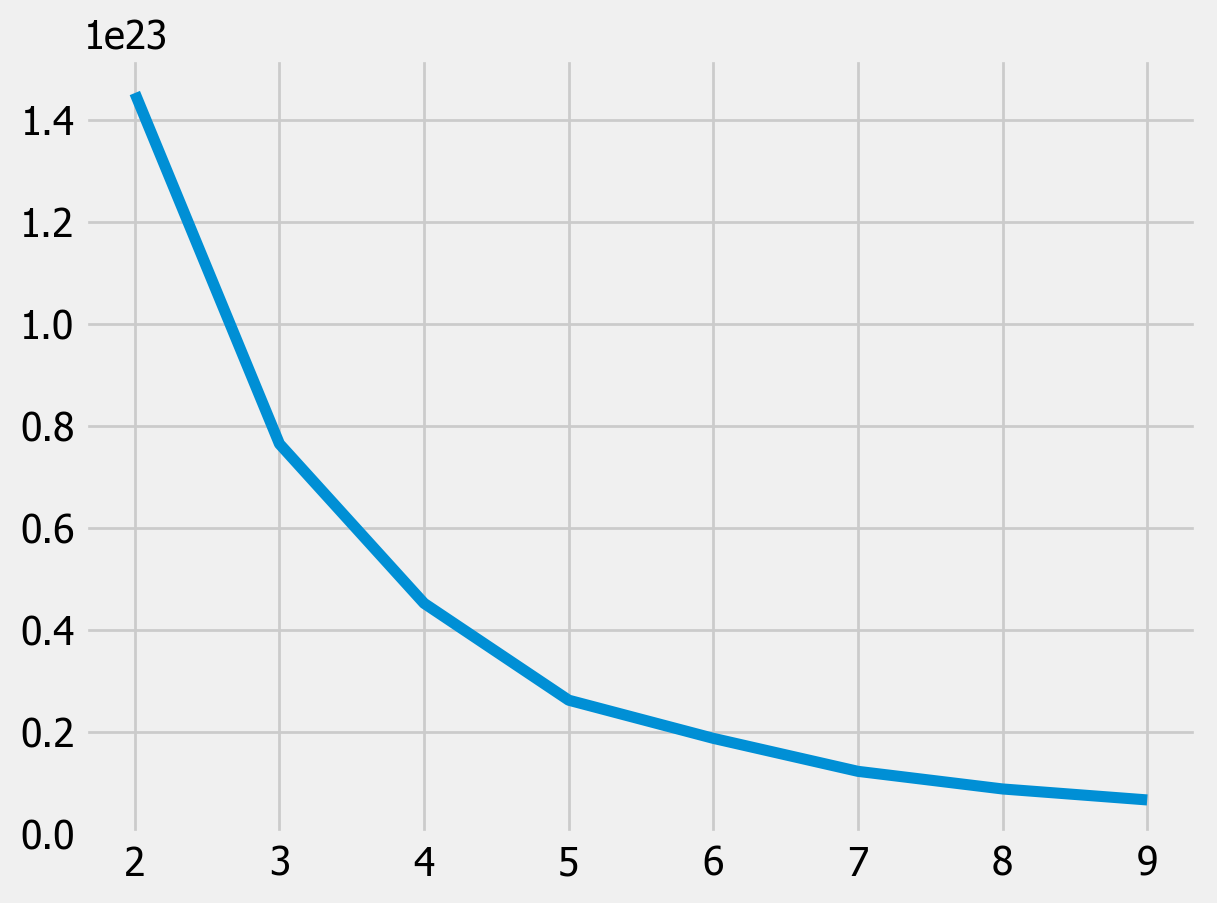

In [23]:
plt.plot(list(score_dict.keys()), list(score_dict.values()))
plt.show()

In [29]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(cluster_data)
cluster_data['Cluster'] = kmeans.predict(cluster_data)

print(cluster_data.groupby('Cluster').agg({'Price': lambda x: x.mean(),
                                           'Rooms': lambda x: x.mean(),
                                           'Floor': lambda x: x.mean(),
                                           'Area': lambda x: x.mean(),
                                           'BuildingAge': lambda x: x.mean()}))



                Price     Rooms     Floor        Area  BuildingAge
Cluster                                                           
0        1.809139e+10  2.455782  4.054422  131.292517     7.500000
1        4.477841e+10  3.158730  4.063492  215.666667     5.809524
2        1.631571e+11  3.428571  5.714286  507.142857     2.000000
3        8.782953e+10  3.473684  6.578947  301.684211     3.052632
4        5.430297e+09  1.757174  3.490066   80.686534     9.748344


f:\Projects\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30076\3633079988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Cluster'] = kmeans.predict(cluster_data)
